## Phase 2 Project

Outline:
* Introduction 
* Challenges
* Proposed Solution 
* Conclusion 
* Problem Statement
* Data Understanding
* Data Cleaning
* Data Analysis
* Modeling
* Conclusions
* Recommendations
* Next Steps



### Introduction
With nearly 2.2 million residents, King County is the largest county in Washington State. Nationally, it is the 13th largest by population and ninth largest by total employment. Two million of its residents live in one of the 39 cities in the county and the remaining 200,000 in the unincorporated area. Seattle, the largest city in the county, is home to 730,000 residents

It is home to Seattle, the state's largest city, and is a hub of innovation, technology, and creative industries. The housing market in King County has been one of the fastest-growing in the country, with strong demand and limited supply leading to a highly competitive market. 

Several nationally-known businesses are collectively the major economic drivers for the region: Amazon, Boeing Commercial Airplanes, Microsoft, Starbucks and the University of Washington.
These large businesses, and along with smaller enterprises, have led King County out of the Great
Recession and into a period of overall economic growth. 

*cite sources*

### Challenges
As a result of this strong economy, the population has increased, attracting new employees for burgeoning businesses, and wages for higher-income households have increased. King County has experienced some of the fastest growing housing prices in the nation. The average King County home value is USD 914,300, an 88 percent jump since 2015.

At its core, the housing crisis is driven by a supply and demand challenge that is two-fold. First, since 2012, King County’s population has grown faster than new homes have been built, creating a growing gap between supply and demand.
Second, King County’s population has not grown evenly across the income spectrum. Sixty percent of the new households in King County between 2006 and 2016 earned USD 125,000 or more per year, while 18 percent earned less than USD 50,000. Middle income earners constituted only 22 percent of new households

In response to demand for housing by high-earner households, housing developers have focused new projects to serve the upper end of the market and many of what were once existing affordable units have increased in price beyond what many middle- and low-income working families can afford.

Since 2012, both rent and home purchase prices have increased faster than income, placing intense pressure on middle- and low-income households throughout King County and forcing many to relocate far from where they work or to struggle with paying more than 30 percent or even 50 percent of their income on housing.


### Problem Statement
New real estate developers are planning to build new housing facilities and there has been a problem in evaluating homes in King County

### Objectives
- To develop a model that will help in identifying the attributes that bring more value to the houses, hence bringing maximum profit. Specifically, to uncover:
 - Which features have the biggest impact on the sale price of a house? 
 - How much does location affect the sale price of a house? 

- To create a regression model to advice developers on how to accurately price a property

### Importing the data

In [194]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
%matplotlib inline
sns.set_style('dark')
warnings.filterwarnings('ignore')
data = pd.read_csv('data/kc_house_data.csv')

data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### Understanding the data
Here we will explore the data to get a better understanding of its state, then decide on the steps we need to take to clean it. We will begin by defining some helper functions for the following tasks:
- getting the shape of the data
- getting data info
- simple check for missing data
- duplicates
- descriptive stats

We will then group together the helper function under a new function that explores the data for the above attributes

In [195]:
# helper function for shape of the data 

def data_shape(data):
    """Simple function to provide the shape of the data"""
    out = print(f"The DataFrame has:\n\t* {data.shape[0]} rows\n\t* {data.shape[1]} columns", '\n')

    return out

In [196]:
# helper function for info of the data 

def data_info(data):
    """Simple function to provide the info of the data"""
    out = print(data.info(), '\n')
    
    return out

In [197]:
# helper function to check for missing values

def data_missing(data):
    """Identify is the data has missing values"""
    # identify if data has missing values(data.isnull().any())
    # empty dict to store missing values
    missing = []
    for i in data.isnull().any():
        # add the bool values to empty list 
        missing.append(i)
    # covert list to set (if data has missing value, the list should have true and false)
    missing_set = set(missing)
    if (len(missing_set) == 1):
        out = print("The Data has no missing values", '\n')
    else:
        out = print(f"The Data has missing values.", '\n')

    return out

In [198]:
# helper function to check for duplicates

def identify_duplicates(data):
    """Simple function to identify any duplicates"""
    # identify the duplicates (dataframename.duplicated() , can add .sum() to get total count)
    # empty list to store Bool results from duplicated
    duplicates = []
    for i in data.duplicated():
        duplicates.append(i)
    # identify if there is any duplicates. (If there is any we expect a True value in the list duplicates)
    duplicates_set = set(duplicates) 
    if (len(duplicates_set) == 1):
        out = print("The Data has no duplicates", '\n')
    else:
        no_true = 0
        for val in duplicates:
            if (val == True):
                no_true += 1
        # percentage of the data represented by duplicates 
        duplicates_percentage = np.round(((no_true / len(data)) * 100), 3)
        out = print(f"The Data has {no_true} duplicated rows.\nThis constitutes {duplicates_percentage}% of the data set.", '\n')

In [199]:
# helper function to check for duplicates on the ID column

def unique_column_duplicates(data, column):
    """handling duplicates in unique column"""
    # empty list to store the duplicate bools
    duplicates = []
    for i in data[column].duplicated():
        duplicates.append(i)
    
    # identify if there are any duplicates
    duplicates_set = set(duplicates)
    if (len(duplicates_set) == 1):
        out = print(f"The column {column.title()} has no duplicates", '\n')
    else:
        no_true = 0
        for val in duplicates:
            if (val == True):
                no_true += 1
        # percentage of the data represented by duplicates 
        duplicates_percentage = np.round(((no_true / len(data)) * 100), 3)
        out = print(f"The column {column.title()} has {no_true} duplicated rows.\nThis constitutes {duplicates_percentage}% of the data set.", '\n')

In [200]:
# helper function to check for descriptive stats

def data_describe(data):
    """Simple function to check the descriptive values of the data"""
    out = print(data.describe(), '\n')
    
    return out

In [201]:
# overall function for data understanding

def explore(data):
    """Group of functions to explore data """
    out1 = data_shape(data)
    out2 = data_info(data)
    out3 = data_missing(data)
    out4 = identify_duplicates(data)
    out5 = unique_column_duplicates(data, 'id')
    out6 = data_describe(data)
    
    return out1, out2, out3, out4, out5

From below, data has:
- 21597 houses sold
- 21 house features : 6 string variables and 15 numeric variables. `date` column is encoded as string instead of datetime, while `sqft_basement` is enconded as string instead of float. These 2 will be corrected
- Missing values which will be investigated and treated
- No duplicates. However, the `id` column which should contain unique identifiers has 177 duplicated values. These will be checked
- From the descriptive stats, there's also potential for some outliers which will need to be veried. e.g. having max 33 bedrooms

Looking at the `date` column which shows sale date, we will extract the month to see if there is a seasonality sale of houses i.e do houses sale more during some months than others?

We will also use the `zipcode` or `lat` & `long` columns to split the locations into the 4 regions of King County namely : North, East, Seattle & South. We will use this to investigate whether location is a factor in house sales i.e. is there a variation in house prices by location?

In [202]:
explore(data)

The DataFrame has:
	* 21597 rows
	* 21 columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  l

(None, None, None, None, None)

### Data Cleaning

#### Change floors from float to int

In [203]:
# change float to int
data['floors'] = data['floors'].astype(int)

#### Cleaning date column
Here we will change the `date` column to string, and then create a new column `month_sold` extracting the sale month from the date column. From the plot below, we see that there is a seasonality trend to house sales. To simplify analysis, we will group the month column into 4 quarters: Q1 (1, 2, 3), Q2 (4, 5, 6), Q3 (7, 8, 9), Q4 (10, 11, 12)

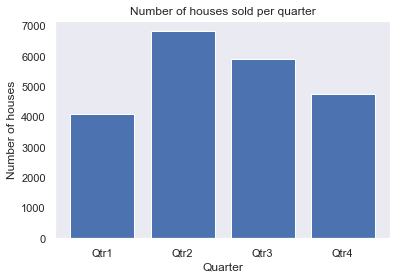

In [204]:
# transform and extract month
data['date'] = pd.to_datetime(data['date'])
data['month_sold'] = data.date.dt.month

# change month to quarters
Q1 = {1: 'Qtr1', 2: 'Qtr1', 3: 'Qtr1'}
Q2 = {4: 'Qtr2', 5: 'Qtr2', 6: 'Qtr2'}
Q3 = {7: 'Qtr3', 8: 'Qtr3', 9: 'Qtr3'}
Q4 = {10: 'Qtr4', 11: 'Qtr4', 12: 'Qtr4'}
quarters = {**Q1, **Q2, **Q3, **Q4}
data['month_sold'] = data['month_sold'].replace(quarters)

a = data.month_sold.value_counts().sort_index()
plt.bar(x=a.index, height=a.values)
plt.xticks(a.index)
plt.title('Number of houses sold per quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of houses');

#### Cleaning sqft_basement column
This column is coded as string, yet it should be float. We change that below. We also discover that the column contains missing values encoded as '?'. Since this accounts for only 2.1% of the data, we can drop them

In [205]:
# inspect columns
print(f'sqft_basement col is encoded as {data.sqft_basement.dtype}')
a1 = data.sqft_basement.value_counts(normalize=True)[1]

def check_qn(data):
    """check for ? in data"""
    for col in data.columns:
        if ('?' in data[col].unique()) == True:
            out = print(f'{col} contains "?". This is {round(a1*100, 2)}% of the data')
            return out
        
check_qn(data)

sqft_basement col is encoded as object
sqft_basement contains "?". This is 2.1% of the data


In [206]:
# since the missing values are insignifcantly small, we drop them
data['sqft_basement'] = pd.to_numeric(data['sqft_basement'].replace('?', np.nan))
data = data.dropna(subset=['sqft_basement'])

# check again for ?
print('"?" in sqft_basement: ','?' in data['sqft_basement'].unique())

#check dtype
print(f'sqft_basement col is encoded as {data.sqft_basement.dtype}')

"?" in sqft_basement:  False
sqft_basement col is encoded as float64


#### Missing values
We have missing values below, however, since these columns will not be used in the analysis. We will not treat the missing data as the columns will be dropped later on

In [207]:
def missing_values(data):
    """A simple function to identify data has missing values"""
    # identify the total missing values per column
    # sort in order 
    miss = data.isnull().sum().sort_values(ascending = False)

    # calculate percentage of the missing values
    percentage_miss = ((data.isnull().sum() / len(data))*100).sort_values(ascending = False)

    # store in a dataframe 
    missing = pd.DataFrame({"Missing Values": miss, "Percentage(%)": percentage_miss})

    # remove values that are missing 
    missing.drop(missing[missing["Percentage(%)"] == 0].index, inplace = True)

    return missing


missing_data = missing_values(data)
missing_data

,Missing Values,Percentage(%)
yr_renovated,3754,17.755285
waterfront,2339,11.062763
view,61,0.288512


#### Duplicated Id Column
Id column duplicates to be dropped in the process below

In [208]:
print(identify_duplicates(data))
print(unique_column_duplicates(data, 'id'))

The Data has no duplicates 

None
The column Id has 173 duplicated rows.
This constitutes 0.818% of the data set. 

None


In [209]:
def drop_duplicates(df, column):
    """function to drop duplicated rows"""
    
    df.drop_duplicates(subset=column, keep='first', inplace=True)
    confirmation = unique_column_duplicates(data, 'id')
    return confirmation

drop_duplicates(data, 'id')

The column Id has no duplicates 



#### Outliers **to be completed**
We will focus on the columns specified below, which we have chosen for the modelling to check outliers

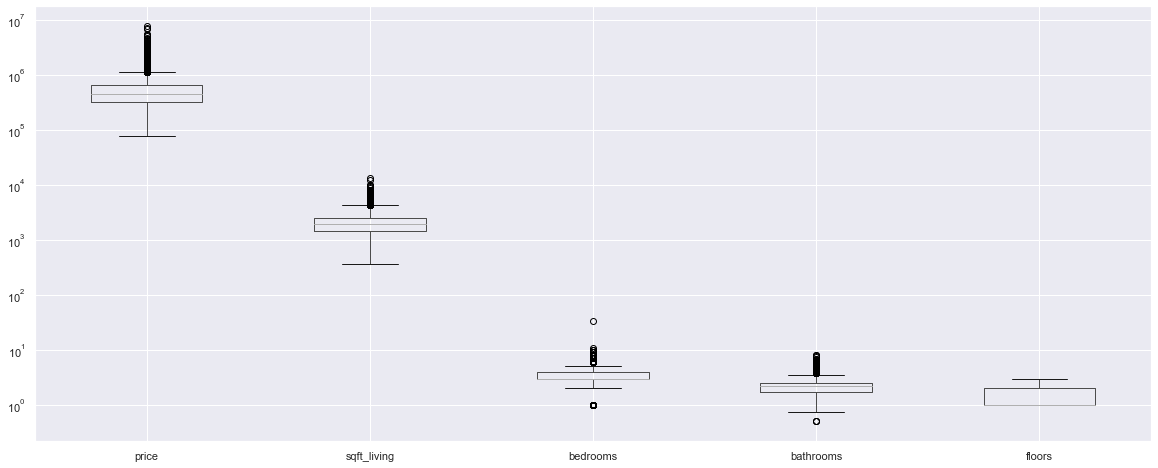

In [210]:
# visualize data to assess outliers

columns = ['price', 'sqft_living', 'bedrooms','bathrooms', 'floors']
data[columns].boxplot(figsize = (20,8))
plt.yscale('log')
plt.show()

In [211]:
# Define the columns to check for outliers
columns = ['bedrooms', 'bathrooms', 'price', 'sqft_living', 'floors']

print("Summary statistics before removing outliers:")
print(data[columns].describe())

# Calculate the IQR for each column
Q1 = data[columns].quantile(0.25)
Q3 = data[columns].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers from each column
data = data[~((data[columns] < (Q1 - 1.5 * IQR)) | (data[columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

print("\nSummary statistics after removing outliers:")
print(data[columns].describe())

Summary statistics before removing outliers:
           bedrooms     bathrooms         price   sqft_living        floors
count  20970.000000  20970.000000  2.097000e+04  20970.000000  20970.000000
mean       3.373343      2.118693  5.409766e+05   2083.747592      1.447639
std        0.924136      0.768475  3.686345e+05    919.294297      0.551640
min        1.000000      0.500000  7.800000e+04    370.000000      1.000000
25%        3.000000      1.750000  3.225000e+05   1430.000000      1.000000
50%        3.000000      2.250000  4.500000e+05   1920.000000      1.000000
75%        4.000000      2.500000  6.450000e+05   2550.000000      2.000000
max       33.000000      8.000000  7.700000e+06  13540.000000      3.000000

Summary statistics after removing outliers:
           bedrooms     bathrooms         price   sqft_living        floors
count  20251.000000  20251.000000  2.025100e+04  20251.000000  20251.000000
mean       3.330453      2.064886  4.962672e+05   2002.429806      1.43464

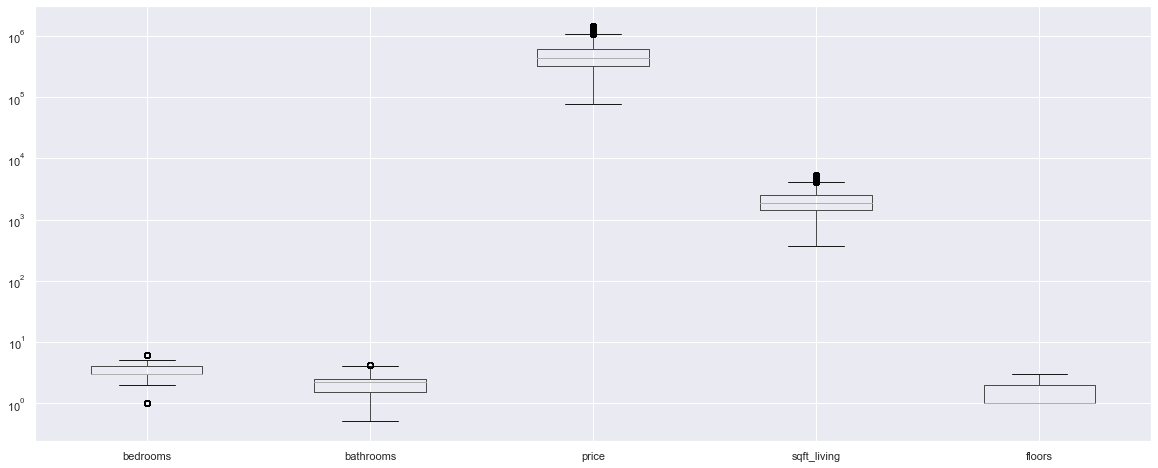

In [212]:
data[columns].boxplot(figsize = (20,8))
plt.yscale('log')
plt.show()

#### Turning Zipcodes into Regions
The code below turns zip codes into the regions for King County. 

In [213]:
# Determine the minimum and maximum latitude and longitude values in the dataset
min_lat = data['lat'].min()
max_lat = data['lat'].max()
min_long = data['long'].min()
max_long = data['long'].max()
# Define the latitude and longitude ranges for each of the four regions
north_lat = max_lat - (max_lat - min_lat) / 2
east_long = min_long + (max_long - min_long) / 2
south_lat = min_lat + (max_lat - min_lat) / 2
# Assign each data point to one of the four regions based on its latitude and longitude values
data['region'] = ''
data.loc[(data['lat'] >= north_lat) & (data['long'] <= east_long), 'region'] = 'Northwest'
data.loc[(data['lat'] >= north_lat) & (data['long'] > east_long), 'region'] = 'Northeast'
data.loc[(data['lat'] < south_lat) & (data['long'] <= east_long), 'region'] = 'Southwest'
data.loc[(data['lat'] < south_lat) & (data['long'] > east_long), 'region'] = 'Southeast'

***TOBE DONE*** RESOLVE ERROR IN CODE BELOW

In [214]:
# visualize the different regions and save to file
import folium
from folium.plugins import MarkerCluster
# create a list of coordinates
latlon = list(zip(data.lat, data.long))
# create a map with the Stamen Terrain tileset
base_map = folium.Map(location=[data.lat.mean(), data.long.mean()], zoom_start=9, tiles='Stamen Terrain')
# add the markers to the map
marker_cluster = MarkerCluster().add_to(base_map)
for coord in latlon:
    folium.Marker(location=[coord[0], coord[1]], icon=None).add_to(marker_cluster)
# save the map as an HTML file
#base_map.save('../images/map.html')

### Data Analysis
We will explore the following areas to set context for the presentation
- Average Price of property based on number of bedrooms
- Average Price of property based on the condition of the property
- Regions (North, East, Seattle & South)
- Price distribution
- Houses Sold Per Quarter


### Average Price of property based on number of bedrooms
As the bedrooms increase, price increases, upto 6 bedrooms. 


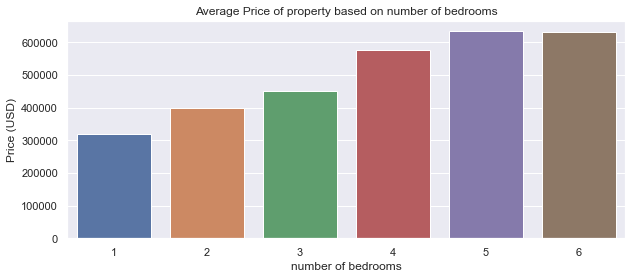

In [215]:
# lets see price against bedrooms
bed_df = data[['bedrooms', 'price']]
bed_df2 = bed_df.groupby(['bedrooms'])[['price']].mean()

# plot the output 
sns.set(rc={'figure.figsize':(10,4)})
sns.barplot(data=bed_df2, 
           x=bed_df2.index, 
           y='price').set(title='Average Price of property based on number of bedrooms',
                                  xlabel='number of bedrooms', ylabel='Price (USD)');

### Average Price of property based on the condition of the property
As the condition of the house improves, price increases - houses with a very good condition have higher prices. Thus keeping property in a good condition will higher valuation

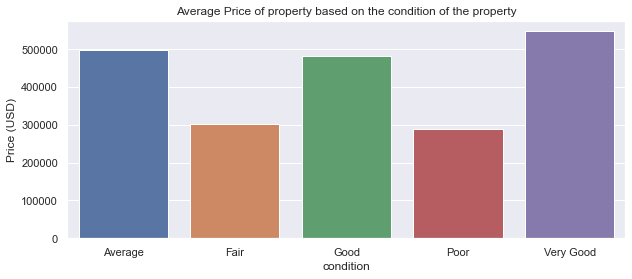

In [216]:
# lets see price of against bedrooms
condition_df = data[['condition', 'price']]
condition_df2 = condition_df.groupby(['condition'])[['price']].mean()

# plot the output
sns.set(rc={'figure.figsize':(10,4)})
sns.barplot(data=condition_df2, 
           x=condition_df2.index, 
           y='price').set(title='Average Price of property based on the condition of the property',
                                  xlabel='condition', ylabel='Price (USD)');

### Price Distribution
Price is almost normally distributed, with a positve skew. There are more lower priced houses, than highly priced houses.

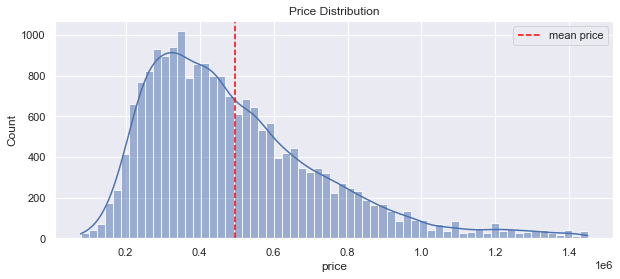

In [217]:
sns.histplot(data.price, kde=True)
plt.title('Price Distribution')
plt.axvline(x=data.price.mean(), label='mean price', linestyle='--', color='red')
plt.legend();

### Houses Sold Per Quarter
Houses sold in quarter 2 have the highest price - trend shows seasonality of house sales

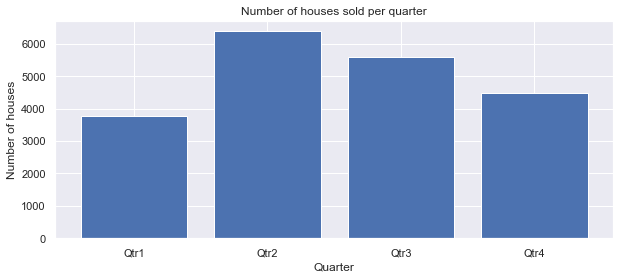

In [218]:
a = data.month_sold.value_counts().sort_index()
plt.bar(x=a.index, height=a.values)
plt.xticks(a.index)
plt.title('Number of houses sold per quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of houses');

### Houses Sold Per Region
Majority of houses are sold in the NorthWest and SouthWest regions - making them ideal locations for developing property

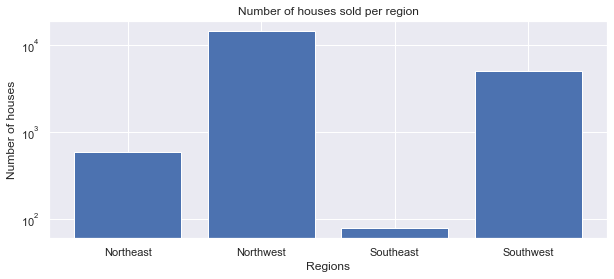

In [219]:
# visaulize houses sold regionally
a = data.region.value_counts().sort_index()
plt.bar(x=a.index, height=a.values)
plt.xticks(a.index)
plt.title('Number of houses sold per region')
plt.xlabel('Regions')
plt.ylabel('Number of houses')
plt.yscale('log');

#### Modelling
Variables chose for the model are:

In [220]:
#creating a matrix to check correlation of the different columns  and storing it in corr_matrix
# the matrix will help us identfy which columns have the highest and lowest correlation with price
corr_matrix= data.corr()
corr_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.002423,0.010477,0.020658,0.001850,-0.133372,0.027068,0.005069,-0.005497,0.026057,-0.012509,-0.011628,-0.003054,0.022040,0.005750,-0.144835
price,-0.002423,1.000000,0.310448,0.472695,0.645536,0.080514,0.244679,0.543702,0.260090,0.051591,0.106918,-0.019030,0.402635,0.044382,0.579455,0.073682
bedrooms,0.010477,0.310448,1.000000,0.501089,0.600683,0.026668,0.145517,0.479948,0.288212,0.173514,-0.001282,-0.159926,-0.030062,0.147733,0.397420,0.024415
bathrooms,0.020658,0.472695,0.501089,1.000000,0.718894,0.061488,0.528238,0.639021,0.230016,0.544151,0.030726,-0.206273,0.001566,0.242348,0.539218,0.062285
sqft_living,0.001850,0.645536,0.600683,0.718894,1.000000,0.150309,0.345064,0.854279,0.381515,0.347540,0.028655,-0.200681,0.028503,0.272228,0.748647,0.165813
sqft_lot,-0.133372,0.080514,0.026668,0.061488,0.150309,1.000000,-0.025476,0.159802,0.001515,0.042857,0.006161,-0.129049,-0.094106,0.223724,0.136137,0.701163
floors,0.027068,0.244679,0.145517,0.528238,0.345064,-0.025476,1.000000,0.525118,-0.277950,0.589405,-0.019801,-0.096291,0.021498,0.161826,0.284341,-0.029408
sqft_above,0.005069,0.543702,0.479948,0.639021,0.854279,0.159802,0.525118,1.000000,-0.154578,0.456169,-0.001785,-0.268063,-0.027516,0.380464,0.722545,0.176897
sqft_basement,-0.005497,0.260090,0.288212,0.230016,0.381515,0.001515,-0.277950,-0.154578,1.000000,-0.150635,0.057411,0.095263,0.103105,-0.159154,0.138038,0.000582
yr_built,0.026057,0.051591,0.173514,0.544151,0.347540,0.042857,0.589405,0.456169,-0.150635,1.000000,-0.219692,-0.343249,-0.152903,0.408133,0.343815,0.063243


In [221]:
price_corr = corr_matrix['price'].sort_values(ascending=False)
price_corr

price            1.000000
sqft_living      0.645536
sqft_living15    0.579455
sqft_above       0.543702
bathrooms        0.472695
lat              0.402635
bedrooms         0.310448
sqft_basement    0.260090
floors           0.244679
yr_renovated     0.106918
sqft_lot         0.080514
sqft_lot15       0.073682
yr_built         0.051591
long             0.044382
id              -0.002423
zipcode         -0.019030
Name: price, dtype: float64

##### Baseline Model
From the correlation analysis, the column `sqft_living` has the strongest correlation to price. We will build our baseline model with this variable. The scatter plot below shows a linear relationship between our predictor and target variable, thus a good candidate for the baseline model

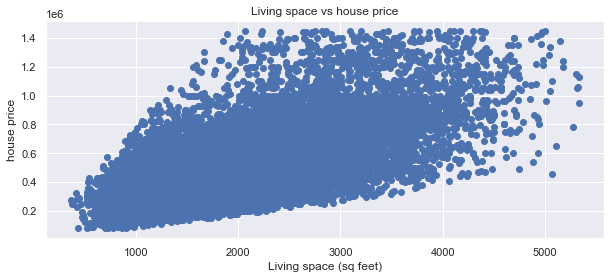

In [222]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.scatter(x = 'sqft_living', y='price', data=data)
ax.set_xlabel('Living space (sq feet)')
ax.set_ylabel('house price')
ax.set_title('Living space vs house price');

We then build the baseline model using the code below

In [223]:
# function for ols regression
def reg_model(X, y):
    """Function to create regression model
    & display summary"""
    model = sm.OLS(y, sm.add_constant(X)).fit()
    results = model.summary()
    return results

In [224]:
import statsmodels.api as sm
#selecting columns for our simple linear regression
y = data['price']
X = data['sqft_living']
#creating a linear regression and fitting data into it
results_baseline = reg_model(X, y)
results_baseline

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                 1.447e+04
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:38:05   Log-Likelihood:            -2.7422e+05
No. Observations:               20251   AIC:                         5.484e+05
Df Residuals:                   20249   BIC:                         5.485e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.013e+05   3528.819     28.713      0.000    9.44e+04    1.08e+05
sqft_living   197.2323      1.640    120.277      0.000     194.018     200.446
==============================================================================
Omnibus:                     2646.145   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4639.787
Skew:                           0.871   Prob(JB):                         0.00
Kurtosis:                       4.570   Cond. No.                     5.88e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the above results:
* The model is statistically significant. The column `sqft_living` explains <b>41.7%</b> of the variance in house prices

* Both the intercept and the target variable p-values are statistically significant. 

* An increase of 1 sq foot in `sqft_living` will result in an increase in house price by <b>USD 197.23</b>
* When `sqft_living` is zero, the house price will be <b>USD 101,300</b>

#### We explored standardization of baseline model
Standardization below did not improve the r2 of the model. Thus we don't explore it in the mutiple regression. We will explore other ways of tuning the model

In [246]:
# standardize baseline model
X_mean = data['sqft_living'].mean()
X_std = data['sqft_living'].std()
X_standardized = (X - X_mean) / X_std

results_baseline_stdized = reg_model(X_standardized, y)
results_baseline_stdized

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                 1.447e+04
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        16:08:57   Log-Likelihood:            -2.7422e+05
No. Observations:               20251   AIC:                         5.484e+05
Df Residuals:                   20249   BIC:                         5.485e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.963e+05   1292.444    383.976      0.000    4.94e+05    4.99e+05
sqft_living   197.2323      1.640    120.277      0.000     194.018     200.446
==============================================================================
Omnibus:                     2646.145   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4639.787
Skew:                           0.871   Prob(JB):                         0.00
Kurtosis:                       4.570   Cond. No.                         788.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Success Measures
We will will rsquared and mae to meet 2 objectives:
- Rsquared will help us asses model improvements in prediction variation in house prices
- mean absolute error will help us to measure the distance of the predicted prices from the actual prices. From the code below, we have chosen mae over rmse because it is less infuenced by outliers

In [225]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

def error_fun(data, colx, coly):
    """Function to calculate mae"""
    
    #reshape columns
    X = data[colx].values.reshape(-1,1)
    y = data[coly].values.reshape(-1,1)
    
    # fit reg model
    regressor = LinearRegression()
    regressor.fit(X,y)
    
    # calculate errors
    y_pred = regressor.predict(X)
    mae = mean_absolute_error(y, y_pred)
    rmse = (mean_squared_error(y, y_pred))**0.5
    
    return mae, rmse

mae, rmse = error_fun(data, 'sqft_living', 'price')

#findning the coeefficient of the regression
print( f'mae : {mae}')

#finding the y intercept of the regression
print( f'rmse : {rmse}')

mae : 141834.56832443876
rmse : 183913.393421447


### First Multiple Regression
For our first multiple mode we begin with numerical variables

In [226]:
#selecting columns for our simple linear regression
X_first_mult = data[['bedrooms', 'bathrooms', 'sqft_living', 'floors']]
#creating a linear regression and fitting data into it
First_model = reg_model(X_first_mult, y)
First_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     3767.
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:38:06   Log-Likelihood:            -2.7405e+05
No. Observations:               20251   AIC:                         5.481e+05
Df Residuals:                   20246   BIC:                         5.481e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.607e+05   5830.788     27.554      0.000    1.49e+05    1.72e+05
bedrooms    -3.482e+04   1908.064    -18.251      0.000   -3.86e+04   -3.11e+04
bathrooms    1.102e+04   2954.324      3.730      0.000    5227.614    1.68e+04
sqft_living   212.2765      2.552     83.190      0.000     207.275     217.278
floors       2624.5807   2782.565      0.943      0.346   -2829.473    8078.635
==============================================================================
Omnibus:                     2778.820   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5047.140
Skew:                           0.893   Prob(JB):                         0.00
Kurtosis:                       4.671   Cond. No.                     1.02e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [227]:
# function to calculate errors for multiple columns
def error_multix(data, colx, coly):
    """Function to calculate mae for 
    multiple X columns"""
    
    #reshape columns
    X = data[colx].values.reshape(-1,len(colx))
    y = data[coly].values.reshape(-1,1)
    
    # fit reg model
    regressor = LinearRegression()
    regressor.fit(X,y)
    
    # calculate errors
    y_pred = regressor.predict(X)
    mae = mean_absolute_error(y, y_pred)
    rmse = (mean_squared_error(y, y_pred))**0.5
    
    return mae, rmse

In [228]:
# mae for first multiple model
X1 = ['bedrooms', 'bathrooms', 'sqft_living', 'floors']
mae_first_mult, rmse_first_mult = error_multix(data, X1, 'price')

#findning the coeefficient of the regression
print( f'mae : {mae_first_mult}')


mae : 139936.47678082326


#### One Hot Encode Categorial Variables For Modelling
For the next step, we will one-hot-encode the following categorical variables for modelling
- `quarters` column: we transformed the date to month, then combined to quarters
- `condition` column with ratings of house condition
- `regions` column: we transfored zipcode to the 4 regions of King County

In [229]:
# Function to one hot encode categorical variables
def categorical_ohe(data, col):
    ohe = pd.get_dummies(data[col], drop_first=True)
    return ohe

# compute ohe for the 3 columns
quarters_ohe =  categorical_ohe(data, 'month_sold')
condition_ohe =  categorical_ohe(data, 'condition')
region_ohe =  categorical_ohe(data, 'region')

# merge the ohe columns with the original data
data_list = [data, quarters_ohe, condition_ohe, region_ohe]
data_ohe = pd.concat(data_list, axis=1)

#### Second Multiple Regression
In this second model we will combine model1 columns plus the above categorical variables: `bedrooms`, `bathrooms`, `sqft_living`, `floors`, econded `months_sold`, `condition` & `region`  

In [230]:
X_multi_second = data_ohe[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'Qtr2', 'Qtr3', 
 'Qtr4', 'Fair', 'Good', 'Poor', 'Very Good', 'Northwest', 'Southeast', 'Southwest']]
Second_model = reg_model(X_multi_second, y)
Second_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     2187.
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:38:06   Log-Likelihood:            -2.7035e+05
No. Observations:               20251   AIC:                         5.407e+05
Df Residuals:                   20236   BIC:                         5.408e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5.638e+04   8337.853      6.762      0.000       4e+04    7.27e+04
bedrooms    -3.008e+04   1597.255    -18.833      0.000   -3.32e+04    -2.7e+04
bathrooms    2.024e+04   2472.221      8.187      0.000    1.54e+04    2.51e+04
sqft_living   201.3034      2.134     94.335      0.000     197.121     205.486
floors       1.219e+04   2418.520      5.039      0.000    7446.948    1.69e+04
Qtr2         3677.8458   3120.658      1.179      0.239   -2438.897    9794.589
Qtr3         -1.35e+04   3202.721     -4.216      0.000   -1.98e+04   -7224.601
Qtr4        -1.417e+04   3358.126     -4.220      0.000   -2.08e+04   -7589.962
Fair        -3.761e+04   1.23e+04     -3.066      0.002   -6.17e+04   -1.36e+04
Good         4.105e+04   2609.297     15.732      0.000    3.59e+04    4.62e+04
Poor        -5.716e+04   2.99e+04     -1.913      0.056   -1.16e+05    1399.874
Very Good    7.583e+04   4165.763     18.204      0.000    6.77e+04     8.4e+04
Northwest    1.272e+05   6372.620     19.966      0.000    1.15e+05     1.4e+05
Southeast   -1.345e+04   1.82e+04     -0.739      0.460   -4.91e+04    2.22e+04
Southwest   -9.858e+04   6621.584    -14.887      0.000   -1.12e+05   -8.56e+04
==============================================================================
Omnibus:                     4090.501   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11982.856
Skew:                           1.058   Prob(JB):                         0.00
Kurtosis:                       6.119   Cond. No.                     6.02e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [235]:
# mae for second multiple model
X2 = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'Qtr2', 'Qtr3', 
 'Qtr4', 'Fair', 'Good', 'Poor', 'Very Good', 'Northwest', 'Southeast', 'Southwest']

mae_second_mult, rmse_second_mult = error_multix(data_ohe, X2, 'price')

#findning the coeefficient of the regression
print( f'mae for second multiple model : {mae_second_mult}')


mae for second multiple model : 109290.13884711674


#### Third Mutiple Regression Model
We will explore adding view column to the model to improve accuracy. Below we will one hot econde, merge, then fit the third model

In [237]:
# one hot encode
view_ohe =  categorical_ohe(data_ohe, 'view')
list_concat = [data_ohe, view_ohe]
data_ohe2 = pd.concat(list_concat, axis=1)

In [239]:
X_multi_third = data_ohe2[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'Qtr2', 'Qtr3', 
 'Qtr4', 'Fair', 'Good', 'Poor', 'Very Good', 'Northwest', 'Southeast', 'Southwest', 
                           'EXCELLENT', 'FAIR', 'GOOD', 'NONE']]
Third_model = reg_model(X_multi_third, y)
Third_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     1889.
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:49:40   Log-Likelihood:            -2.6970e+05
No. Observations:               20251   AIC:                         5.394e+05
Df Residuals:                   20232   BIC:                         5.396e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.385e+05   9376.179     14.773      0.000     1.2e+05    1.57e+05
bedrooms    -2.446e+04   1554.670    -15.736      0.000   -2.75e+04   -2.14e+04
bathrooms    1.885e+04   2394.652      7.872      0.000    1.42e+04    2.35e+04
sqft_living   187.4571      2.103     89.122      0.000     183.334     191.580
floors       1.886e+04   2350.686      8.023      0.000    1.43e+04    2.35e+04
Qtr2         4692.1366   3022.556      1.552      0.121   -1232.319    1.06e+04
Qtr3        -1.235e+04   3102.198     -3.982      0.000   -1.84e+04   -6273.210
Qtr4        -1.359e+04   3252.325     -4.179      0.000      -2e+04   -7217.011
Fair        -3.553e+04   1.19e+04     -2.991      0.003   -5.88e+04   -1.22e+04
Good         3.768e+04   2528.633     14.902      0.000    3.27e+04    4.26e+04
Poor        -7.713e+04   2.89e+04     -2.665      0.008   -1.34e+05   -2.04e+04
Very Good    7.225e+04   4035.754     17.903      0.000    6.43e+04    8.02e+04
Northwest    1.257e+05   6174.823     20.360      0.000    1.14e+05    1.38e+05
Southeast   -1.489e+04   1.76e+04     -0.845      0.398   -4.95e+04    1.97e+04
Southwest   -9.845e+04   6415.836    -15.345      0.000   -1.11e+05   -8.59e+04
EXCELLENT    1.846e+05   1.19e+04     15.479      0.000    1.61e+05    2.08e+05
FAIR         1.007e+04   9907.986      1.016      0.309   -9349.082    2.95e+04
GOOD         6.287e+04   8829.004      7.121      0.000    4.56e+04    8.02e+04
NONE        -8.926e+04   5083.963    -17.558      0.000   -9.92e+04   -7.93e+04
==============================================================================
Omnibus:                     3602.375   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10429.303
Skew:                           0.941   Prob(JB):                         0.00
Kurtosis:                       5.970   Cond. No.                     6.03e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [243]:
# mae for third multiple model
X3 = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'Qtr2', 'Qtr3', 
 'Qtr4', 'Fair', 'Good', 'Poor', 'Very Good', 'Northwest', 'Southeast', 
      'Southwest', 'EXCELLENT', 'FAIR', 'GOOD', 'NONE']

mae_third_mult, rmse_third_mult = error_multix(data_ohe2, X3, 'price')

#findning the coeefficient of the regression
print( f'mae for third multiple model : {mae_third_mult}')

mae for third multiple model : 106187.09287959641


#### Check for Multicollinearity
Below we do a correlation matrix for all predictor variables. bathrooms and square foot living are highly correlated. In our fourth model, we take out bathrooms to address this

In [241]:
X_multi_third.corr()

,bedrooms,bathrooms,sqft_living,floors,Qtr2,Qtr3,Qtr4,Fair,Good,Poor,Very Good,Northwest,Southeast,Southwest,EXCELLENT,FAIR,GOOD,NONE
bedrooms,1.000000,0.501089,0.600683,0.145517,0.004144,0.001650,-0.004789,-0.051193,-0.004381,-0.037983,0.020566,-0.032752,-0.022294,0.038344,0.006803,0.012156,0.031128,-0.049844
bathrooms,0.501089,1.000000,0.718894,0.528238,0.012164,0.014820,-0.008496,-0.077531,-0.175128,-0.045050,-0.041609,-0.020187,-0.013681,0.005575,0.036179,0.026939,0.078483,-0.109665
sqft_living,0.600683,0.718894,1.000000,0.345064,0.009266,0.015995,-0.004247,-0.070270,-0.087273,-0.038131,-0.029784,0.009009,-0.014736,-0.026895,0.072484,0.057648,0.122850,-0.192378
floors,0.145517,0.528238,0.345064,1.000000,-0.000847,0.011672,0.002101,-0.051460,-0.273323,-0.025843,-0.152484,0.006169,-0.013456,-0.029679,-0.007550,-0.025844,0.000902,0.019567
Qtr2,0.004144,0.012164,0.009266,-0.000847,1.000000,-0.419876,-0.361412,-0.003077,0.005898,0.002362,-0.000387,0.020015,0.003532,-0.023645,-0.004546,-0.002183,0.007996,0.001374
Qtr3,0.001650,0.014820,0.015995,0.011672,-0.419876,1.000000,-0.329167,-0.019421,0.007838,-0.006758,0.021974,0.004695,-0.006824,-0.007631,0.003607,0.002725,0.000191,0.005224
Qtr4,-0.004789,-0.008496,-0.004247,0.002101,-0.361412,-0.329167,1.000000,0.004531,-0.011039,0.000864,0.001899,0.003474,0.004886,0.000372,0.005491,-0.004674,-0.006126,-0.000426
Fair,-0.051193,-0.077531,-0.070270,-0.051460,-0.003077,-0.019421,0.004531,1.000000,-0.053079,-0.003169,-0.025669,-0.013595,0.012532,0.006657,-0.008464,-0.010710,-0.004558,0.019486
Good,-0.004381,-0.175128,-0.087273,-0.273323,0.005898,0.007838,-0.011039,-0.053079,1.000000,-0.021530,-0.174383,-0.045034,-0.008861,0.072148,0.017965,0.019066,0.017548,-0.026972
Poor,-0.037983,-0.045050,-0.038131,-0.025843,0.002362,-0.006758,0.000864,-0.003169,-0.021530,1.000000,-0.010412,0.010154,-0.002244,-0.010993,0.025633,0.007204,-0.005115,-0.003481


#### Fourth Model Addressing Multicollinearity

In [242]:

X_multi_fourth = data_ohe2[['bedrooms', 'sqft_living', 'floors', 'Qtr2', 'Qtr3', 
 'Qtr4', 'Fair', 'Good', 'Poor', 'Very Good', 'Northwest', 'Southeast', 'Southwest', 
                           'EXCELLENT', 'FAIR', 'GOOD', 'NONE']]
Fourth_model = reg_model(X_multi_fourth, y)
Fourth_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     1990.
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:57:49   Log-Likelihood:            -2.6973e+05
No. Observations:               20251   AIC:                         5.395e+05
Df Residuals:                   20233   BIC:                         5.396e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         1.42e+05   9379.890     15.138      0.000    1.24e+05     1.6e+05
bedrooms     -2.23e+04   1532.438    -14.551      0.000   -2.53e+04   -1.93e+04
sqft_living   196.1516      1.793    109.412      0.000     192.638     199.666
floors       2.653e+04   2142.222     12.386      0.000    2.23e+04    3.07e+04
Qtr2         4987.8116   3026.873      1.648      0.099    -945.106    1.09e+04
Qtr3        -1.216e+04   3106.770     -3.914      0.000   -1.82e+04   -6069.513
Qtr4        -1.362e+04   3257.221     -4.180      0.000      -2e+04   -7231.520
Fair        -3.847e+04   1.19e+04     -3.235      0.001   -6.18e+04   -1.52e+04
Good         3.637e+04   2526.887     14.391      0.000    3.14e+04    4.13e+04
Poor        -8.167e+04    2.9e+04     -2.818      0.005   -1.38e+05   -2.49e+04
Very Good    7.284e+04   4041.132     18.025      0.000    6.49e+04    8.08e+04
Northwest    1.258e+05   6184.115     20.339      0.000    1.14e+05    1.38e+05
Southeast   -1.436e+04   1.77e+04     -0.813      0.416    -4.9e+04    2.03e+04
Southwest   -9.754e+04   6424.451    -15.183      0.000    -1.1e+05   -8.49e+04
EXCELLENT    1.844e+05   1.19e+04     15.446      0.000    1.61e+05    2.08e+05
FAIR         1.035e+04   9922.841      1.043      0.297   -9100.792    2.98e+04
GOOD          6.36e+04   8841.803      7.193      0.000    4.63e+04    8.09e+04
NONE        -8.957e+04   5091.468    -17.592      0.000   -9.95e+04   -7.96e+04
==============================================================================
Omnibus:                     3568.632   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10371.200
Skew:                           0.931   Prob(JB):                         0.00
Kurtosis:                       5.970   Cond. No.                     6.02e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [244]:
# mae for fourth multiple model
X4 = ['bedrooms', 'sqft_living', 'floors', 'Qtr2', 'Qtr3', 
 'Qtr4', 'Fair', 'Good', 'Poor', 'Very Good', 'Northwest', 'Southeast', 
      'Southwest', 'EXCELLENT', 'FAIR', 'GOOD', 'NONE']

mae_fourth_mult, rmse_fourth_mult = error_multix(data_ohe2, X4, 'price')

#findning the coeefficient of the regression
print( f'mae for fourth multiple model : {mae_fourth_mult}')

mae for fourth multiple model : 106332.17537614451


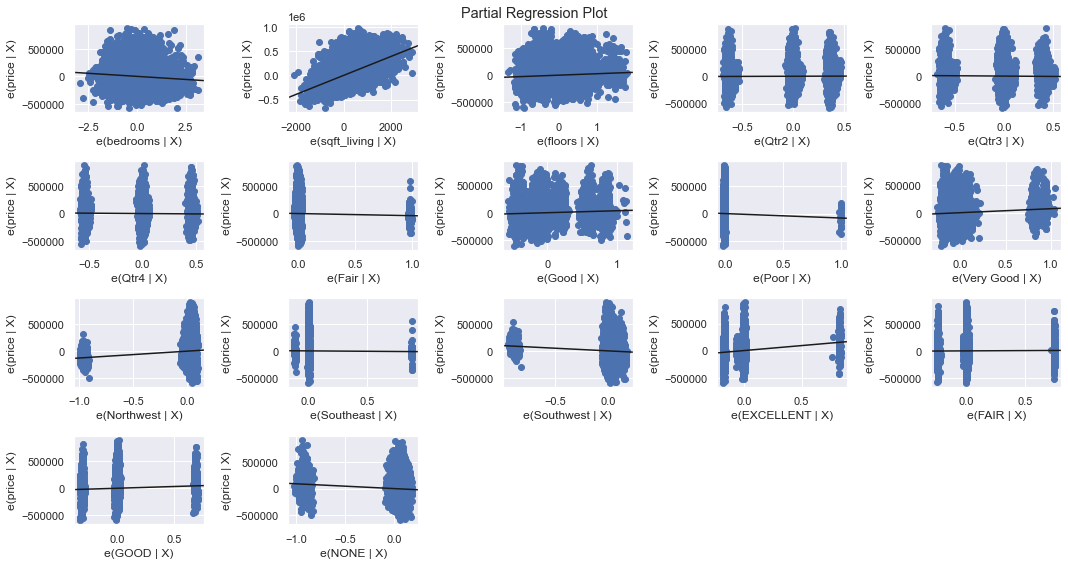

In [250]:
fig = plt.figure(figsize=(15,8))
results = sm.OLS(y, sm.add_constant(X_multi_fourth)).fit()
sm.graphics.plot_partregress_grid(
    results,
    exog_idx=list(X_multi_fourth.columns.values),
    grid=(4,5),
    fig=fig)

plt.show()